In [1]:
!pip install numpy

In [2]:
!pip install opencv-python

In [36]:
import numpy as np
import argparse
import cv2
import os
from google.colab.patches import cv2_imshow

In [26]:
# Paths to load the model
PROTOTXT = "/content/Model_Files/colorization_deploy_v2.prototxt"
POINTS = "/content/Model_Files/pts_in_hull.npy"
MODEL = "/content/Model_Files/colorization_release_v2.caffemodel"

In [27]:
#Path to load the image
IMG_DIR = r"/content/images"
IMG = os.path.join(IMG_DIR,r"boat.jpg")

In [28]:
# Load the Model
print("Load model")
net = cv2.dnn.readNetFromCaffe(PROTOTXT, MODEL)
pts = np.load(POINTS)

Load model


In [29]:
# Load centers for ab channel quantization used for rebalancing.
class8 = net.getLayerId("class8_ab")
conv8 = net.getLayerId("conv8_313_rh")
pts = pts.transpose().reshape(2, 313, 1, 1)
net.getLayer(class8).blobs = [pts.astype("float32")]
net.getLayer(conv8).blobs = [np.full([1, 313], 2.606, dtype="float32")]

In [30]:
# Load the input image
image = cv2.imread("/content/images/boat.jpg")
scaled = image.astype("float32") / 255.0
lab = cv2.cvtColor(scaled, cv2.COLOR_BGR2LAB)

In [31]:
resized = cv2.resize(lab, (224, 224))
L = cv2.split(resized)[0]
L -= 50

In [32]:
print("Colorizing the image")
net.setInput(cv2.dnn.blobFromImage(L))
ab = net.forward()[0, :, :, :].transpose((1, 2, 0))

Colorizing the image


In [33]:
ab = cv2.resize(ab, (image.shape[1], image.shape[0]))

L = cv2.split(lab)[0]
colorized = np.concatenate((L[:, :, np.newaxis], ab), axis=2)

colorized = cv2.cvtColor(colorized, cv2.COLOR_LAB2BGR)
colorized = np.clip(colorized, 0, 1)

colorized = (255 * colorized).astype("uint8")

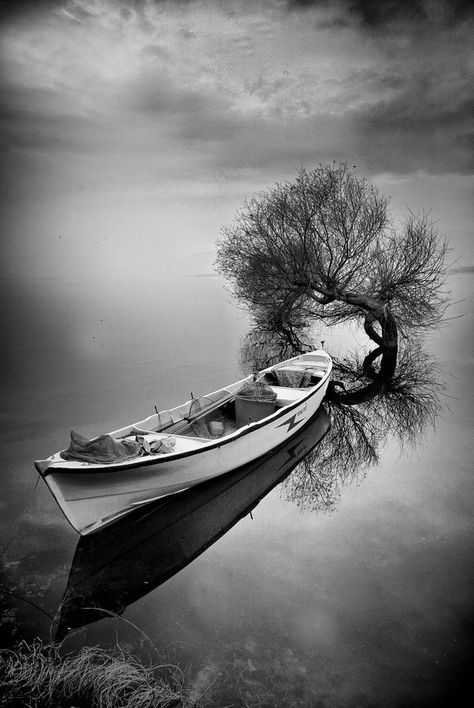

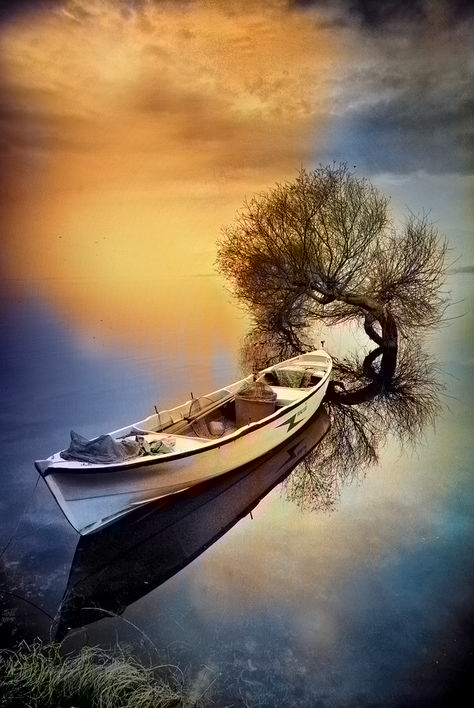

-1

In [38]:
cv2_imshow(image)
cv2_imshow(colorized)
cv2.waitKey(0)